# 4️⃣ STEP-BY-STEP MODELING WORKFLOW

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\Anthony Bannerman\Documents\Codveda-Internship-Data-Science\Task_1_Data_Cleaning_Churn\churn_cleaned.csv")


In [4]:
#Step 1: Separate Features & Target
X = df.drop('Churn', axis=1)
y = df['Churn']


# 🔹 Step 2: Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 🔹 Step 3: Scale Numerical Features (Important!)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 🔹 Step 4: Train Logistic Regression Model

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 🔹 Step 5: Make Predictions

In [8]:
y_pred = model.predict(X_test_scaled)

# 5️⃣ MODEL EVALUATION (THIS IS KEY)

In [9]:
#🔹 Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       115
           1       0.56      0.26      0.36        19

    accuracy                           0.87       134
   macro avg       0.72      0.61      0.64       134
weighted avg       0.84      0.87      0.84       134



#🔹 Confusion Matrix

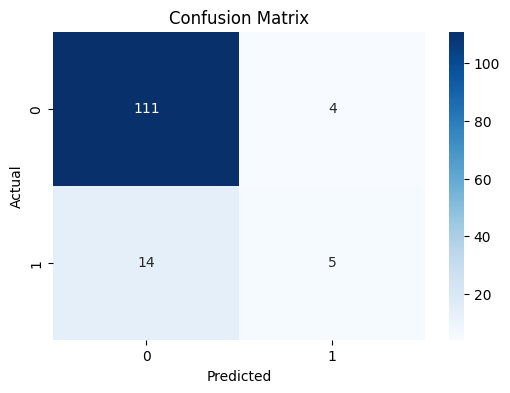

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#1️⃣ Handle Class Imbalance (BEST NEXT STEP)

In [12]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)


In [13]:
#🔹 Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       115
           1       0.56      0.26      0.36        19

    accuracy                           0.87       134
   macro avg       0.72      0.61      0.64       134
weighted avg       0.84      0.87      0.84       134



In [14]:
# Improve churn detection using class weighting

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_scaled, y_train)
y_pred_bal = model.predict(X_test_scaled)


In [20]:
#🔹 Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       115
           1       0.26      0.37      0.30        19

    accuracy                           0.76       134
   macro avg       0.57      0.60      0.58       134
weighted avg       0.80      0.76      0.78       134



In [18]:
# 🚀 NEXT STEP: FEATURE IMPORTANCE (STEP-BY-STEP)

In [21]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
17,Customer service calls,1.183928
2,International plan,0.677426
58,State_SD,0.398891
5,Total day minutes,0.384804
43,State_MT,0.384596
7,Total day charge,0.384160
56,State_RI,0.383744
10,Total eve charge,0.382915
8,Total eve minutes,0.382185
30,State_ID,0.379970
